# 2.2 Integration with pandas data frames


<div class="alert alert-warning">

Note: This example is in the process of being updated for the latest versions of signac and signac-flow. See the `to_dataframe()` method in the meantime.
    
    
</div>

As was shown earlier, we can use indexes to search for specific data points.
One way to operate on the data is using pandas data frames.

*Please note: The following steps require the pandas package.*

In [1]:
import pandas as pd
import signac

project = signac.get_project(root="projects/tutorial")

Let's first create a basic index and use it to construct an index data frame:

In [2]:
df_index = pd.DataFrame(project.index())
df_index.head()

_id  \
0  0e909ffdba496bbb590fbce31f3a4563   
1  6a7e3ef575478edbe08e4a6e4f0e6365   
2  66ca1e809607580496c8ac4825e57e7d   
3  1f147aff97cbbda8aa7c4457a9b51159   
4  f906bdf73414abbbd2e8d2b672201fb3   

                                          statepoint      V_liq        V_gas  \
0  {'p': 3.4000000000000004, 'kT': 1.0, 'N': 1000...   0.000000   294.117647   
1  {'N': 1000, 'p': 2.3000000000000003, 'kT': 1.0...  32.802659   216.994975   
2  {'p': 7.800000000000001, 'kT': 1.0, 'N': 1000,...   0.000000   128.205128   
3  {'N': 1000, 'p': 4.5, 'kT': 1.0, 'a': 1.355, '...  32.801209   110.715506   
4   {'p': 1.0, 'kT': 1.0, 'N': 1000, 'a': 0, 'b': 0}   0.000000  1000.000000   

       fluid                         signac_id  \
0  ideal gas  0e909ffdba496bbb590fbce31f3a4563   
1      argon  6a7e3ef575478edbe08e4a6e4f0e6365   
2  ideal gas  66ca1e809607580496c8ac4825e57e7d   
3      argon  1f147aff97cbbda8aa7c4457a9b51159   
4        NaN  f906bdf73414abbbd2e8d2b672201fb3   

                                                root  
0  /home/bdice/code/signac-examples/notebooks/pro...  
1  /home/bdice/code/signac-examples/notebooks/pro...  
2  /home/bdice/code/signac-examples/notebooks/pro...  
3  /home/bdice/code/signac-examples/notebooks/pro...  
4  /home/bdice/code/signac-examples/notebooks/pro...

It is a good idea, to explicitly use the `_id` value as index key:

In [3]:
df_index = df_index.set_index(["_id"])
df_index.head()

statepoint  \
_id                                                                                   
0e909ffdba496bbb590fbce31f3a4563  {'p': 3.4000000000000004, 'kT': 1.0, 'N': 1000...   
6a7e3ef575478edbe08e4a6e4f0e6365  {'N': 1000, 'p': 2.3000000000000003, 'kT': 1.0...   
66ca1e809607580496c8ac4825e57e7d  {'p': 7.800000000000001, 'kT': 1.0, 'N': 1000,...   
1f147aff97cbbda8aa7c4457a9b51159  {'N': 1000, 'p': 4.5, 'kT': 1.0, 'a': 1.355, '...   
f906bdf73414abbbd2e8d2b672201fb3   {'p': 1.0, 'kT': 1.0, 'N': 1000, 'a': 0, 'b': 0}   

                                      V_liq        V_gas      fluid  \
_id                                                                   
0e909ffdba496bbb590fbce31f3a4563   0.000000   294.117647  ideal gas   
6a7e3ef575478edbe08e4a6e4f0e6365  32.802659   216.994975      argon   
66ca1e809607580496c8ac4825e57e7d   0.000000   128.205128  ideal gas   
1f147aff97cbbda8aa7c4457a9b51159  32.801209   110.715506      argon   
f906bdf73414abbbd2e8d2b672201fb3   0.000000  1000.000000        NaN   

                                                         signac_id  \
_id                                                                  
0e909ffdba496bbb590fbce31f3a4563  0e909ffdba496bbb590fbce31f3a4563   
6a7e3ef575478edbe08e4a6e4f0e6365  6a7e3ef575478edbe08e4a6e4f0e6365   
66ca1e809607580496c8ac4825e57e7d  66ca1e809607580496c8ac4825e57e7d   
1f147aff97cbbda8aa7c4457a9b51159  1f147aff97cbbda8aa7c4457a9b51159   
f906bdf73414abbbd2e8d2b672201fb3  f906bdf73414abbbd2e8d2b672201fb3   

                                                                               root  
_id                                                                                  
0e909ffdba496bbb590fbce31f3a4563  /home/bdice/code/signac-examples/notebooks/pro...  
6a7e3ef575478edbe08e4a6e4f0e6365  /home/bdice/code/signac-examples/notebooks/pro...  
66ca1e809607580496c8ac4825e57e7d  /home/bdice/code/signac-examples/notebooks/pro...  
1f147aff97cbbda8aa7c4457a9b51159  /home/bdice/code/signac-examples/notebooks/pro...  
f906bdf73414abbbd2e8d2b672201fb3  /home/bdice/code/signac-examples/notebooks/pro...

Furthermore, the index would be more useful if each statepoint parameter had its own column.

In [4]:
statepoints = {doc["_id"]: doc["statepoint"] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df.head()

p   kT       N      a        b  \
0e909ffdba496bbb590fbce31f3a4563  3.4  1.0  1000.0  0.000  0.00000   
6a7e3ef575478edbe08e4a6e4f0e6365  2.3  1.0  1000.0  1.355  0.03201   
66ca1e809607580496c8ac4825e57e7d  7.8  1.0  1000.0  0.000  0.00000   
1f147aff97cbbda8aa7c4457a9b51159  4.5  1.0  1000.0  1.355  0.03201   
f906bdf73414abbbd2e8d2b672201fb3  1.0  1.0  1000.0  0.000  0.00000   

                                                                         statepoint  \
0e909ffdba496bbb590fbce31f3a4563  {'p': 3.4000000000000004, 'kT': 1.0, 'N': 1000...   
6a7e3ef575478edbe08e4a6e4f0e6365  {'N': 1000, 'p': 2.3000000000000003, 'kT': 1.0...   
66ca1e809607580496c8ac4825e57e7d  {'p': 7.800000000000001, 'kT': 1.0, 'N': 1000,...   
1f147aff97cbbda8aa7c4457a9b51159  {'N': 1000, 'p': 4.5, 'kT': 1.0, 'a': 1.355, '...   
f906bdf73414abbbd2e8d2b672201fb3   {'p': 1.0, 'kT': 1.0, 'N': 1000, 'a': 0, 'b': 0}   

                                      V_liq        V_gas      fluid  \
0e909ffdba496bbb590fbce31f3a4563   0.000000   294.117647  ideal gas   
6a7e3ef575478edbe08e4a6e4f0e6365  32.802659   216.994975      argon   
66ca1e809607580496c8ac4825e57e7d   0.000000   128.205128  ideal gas   
1f147aff97cbbda8aa7c4457a9b51159  32.801209   110.715506      argon   
f906bdf73414abbbd2e8d2b672201fb3   0.000000  1000.000000        NaN   

                                                         signac_id  \
0e909ffdba496bbb590fbce31f3a4563  0e909ffdba496bbb590fbce31f3a4563   
6a7e3ef575478edbe08e4a6e4f0e6365  6a7e3ef575478edbe08e4a6e4f0e6365   
66ca1e809607580496c8ac4825e57e7d  66ca1e809607580496c8ac4825e57e7d   
1f147aff97cbbda8aa7c4457a9b51159  1f147aff97cbbda8aa7c4457a9b51159   
f906bdf73414abbbd2e8d2b672201fb3  f906bdf73414abbbd2e8d2b672201fb3   

                                                                               root  
0e909ffdba496bbb590fbce31f3a4563  /home/bdice/code/signac-examples/notebooks/pro...  
6a7e3ef575478edbe08e4a6e4f0e6365  /home/bdice/code/signac-examples/notebooks/pro...  
66ca1e809607580496c8ac4825e57e7d  /home/bdice/code/signac-examples/notebooks/pro...  
1f147aff97cbbda8aa7c4457a9b51159  /home/bdice/code/signac-examples/notebooks/pro...  
f906bdf73414abbbd2e8d2b672201fb3  /home/bdice/code/signac-examples/notebooks/pro...

Now we can select specific data subsets, for example to calculate the mean gas volume of argon for a pressure *p* between 2.0 and 5.0:

In [5]:
df[(df.fluid == "argon") & (df.p > 2.0) & (df.p <= 5.0)].V_gas.mean()

158.12444608049674

Or we can plot a p-V phase diagram for argon (*requires matplotlib*).

<AxesSubplot:xlabel='p'>

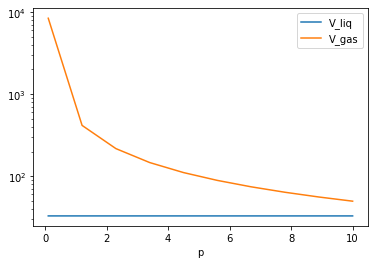

In [6]:
%matplotlib inline

df_water = df[df.fluid == "argon"][["p", "V_liq", "V_gas"]]
df_water.sort_values("p").set_index("p").plot(logy=True)

Or we group the data by fluid and compare the gas densities for low pressures:

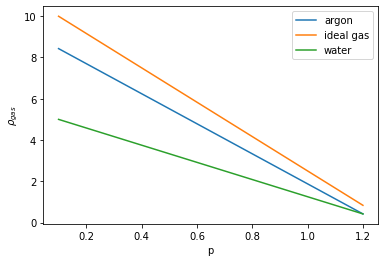

In [7]:
from matplotlib import pyplot as plt

for fluid, group in df[df.p < 2].groupby("fluid"):
    d = group.sort_values("p")
    plt.plot(d["p"], d["V_gas"] / d["N"], label=fluid)
plt.xlabel("p")
plt.ylabel(r"$\rho_{gas}$")
plt.legend(loc=0)
plt.show()